In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [430]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [431]:

df = dd.read_csv('Wavetronix Nov Dec 2023.csv')
df.head()

,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,cst-time,month,day
0,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB RL,OK,1,...,0,2,OpenTMS-Detector47216-1,e,unknown,60,NORMAL,2022-11-14-00-01-22,11,14
1,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB LL,OK,2,...,0,0,OpenTMS-Detector47216-2,e,unknown,60,NORMAL,2022-11-14-00-01-22,11,14
2,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB EX RL,OK,3,...,0,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-00-01-22,11,14
3,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-00-01-22,11,14
4,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-WB LL,OK,5,...,1,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-00-01-22,11,14


In [432]:

df['detector-id'].unique().compute()

0         DMDS62-EB RL
1         DMDS62-EB LL
2      DMDS62-EB EX RL
3      DMDS62-EB EX LL
4         DMDS62-WB LL
            ...       
476       DMDS51-NB RL
477       DMDS51-NB LL
478       DMDS51-SB LL
479       DMDS51-SB RL
480       DMDS51-SB EN
Name: detector-id, Length: 481, dtype: object

In [433]:

df_11_14 = df[(df['month']==11) & (df['day']==14)]
df_11_14_DMDS62 = df_11_14[df_11_14['detector-id'].str.startswith('DMDS62')]

In [434]:
df_11_14_DMDS62 = df_11_14_DMDS62.compute()

In [435]:

df_11_14_DMDS62.to_csv('DMDS62_11_14.csv', index=False)

In [436]:
# read csv file
# df_11_14_DMDS62 = pd.read_csv('DMDS62_11_14.csv')

In [437]:
print(df_11_14_DMDS62.shape)
print(df_11_14_DMDS62['detector-id'].unique())
display(pd.concat([df_11_14_DMDS62.head(), df_11_14_DMDS62.tail()]))


(33392, 24)
['DMDS62-EB RL' 'DMDS62-EB LL' 'DMDS62-EB EX RL' 'DMDS62-EB EX LL'
 'DMDS62-WB LL' 'DMDS62-WB RL' 'DMDS62-WB EN LL' 'DMDS62-WB EN RL']


,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,cst-time,month,day
0,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB RL,OK,1,...,0,2,OpenTMS-Detector47216-1,e,unknown,60,NORMAL,2022-11-14-00-01-22,11,14
1,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB LL,OK,2,...,0,0,OpenTMS-Detector47216-2,e,unknown,60,NORMAL,2022-11-14-00-01-22,11,14
2,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB EX RL,OK,3,...,0,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-00-01-22,11,14
3,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-00-01-22,11,14
4,Q-Free,Q-Free,20000503,184400,0,184300,184400,DMDS62-WB LL,OK,5,...,1,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-00-01-22,11,14
164857,Q-Free,Q-Free,20000504,181700,0,181600,181700,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-23-34-21,11,14
164858,Q-Free,Q-Free,20000504,181700,0,181600,181700,DMDS62-WB LL,OK,5,...,0,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-23-34-21,11,14
164859,Q-Free,Q-Free,20000504,181700,0,181600,181700,DMDS62-WB RL,OK,6,...,1,0,OpenTMS-Detector47216-6,w,unknown,60,NORMAL,2022-11-14-23-34-21,11,14
164860,Q-Free,Q-Free,20000504,181700,0,181600,181700,DMDS62-WB EN LL,OK,7,...,0,3,OpenTMS-Detector47216-7,not directional,unknown,60,ON_RAMP,2022-11-14-23-34-21,11,14
164861,Q-Free,Q-Free,20000504,181700,0,181600,181700,DMDS62-WB EN RL,OK,8,...,0,0,OpenTMS-Detector47216-8,not directional,unknown,60,ON_RAMP,2022-11-14-23-34-21,11,14


In [438]:
#rename the column "start-ime" to "start-time"
df_11_14_DMDS62.rename(columns={'start-ime':'start-time'}, inplace=True)
df_11_14_DMDS62 = df_11_14_DMDS62.sort_values(by=['start-time'])
display(pd.concat([df_11_14_DMDS62.head(), df_11_14_DMDS62.tail()]))

,owner-id,network-id,date,time,utc-offset,start-time,end-time,detector-id,status,lane-id,...,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,cst-time,month,day
80659,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-EB LL,OK,2,...,0,0,OpenTMS-Detector47216-2,e,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80663,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-WB RL,OK,6,...,3,0,OpenTMS-Detector47216-6,w,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80662,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-WB LL,OK,5,...,0,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80661,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-42,11,14
80660,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-EB EX RL,OK,3,...,0,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-42,11,14
46432,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-17-42,11,14
46431,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-EB EX RL,OK,3,...,2,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-05-17-42,11,14
46429,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-EB RL,OK,1,...,0,0,OpenTMS-Detector47216-1,e,unknown,60,NORMAL,2022-11-14-05-17-42,11,14
92982,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-02,11,14
50378,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-WB EN LL,OK,7,...,0,0,OpenTMS-Detector47216-7,not directional,unknown,60,ON_RAMP,2022-11-14-05-17-22,11,14


In [439]:
# preprocess the data, handle missing values, etc.
# remove the repititive rows if they have the same "start-time" and "detector-id"

df_11_14_DMDS62 = df_11_14_DMDS62.drop_duplicates(subset=['start-time', 'detector-id'], keep='first')

In [440]:
df_11_14_DMDS62

,owner-id,network-id,date,time,utc-offset,start-time,end-time,detector-id,status,lane-id,...,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,cst-time,month,day
80659,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-EB LL,OK,2,...,0,0,OpenTMS-Detector47216-2,e,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80663,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-WB RL,OK,6,...,3,0,OpenTMS-Detector47216-6,w,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80662,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-WB LL,OK,5,...,0,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80661,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-42,11,14
80660,Q-Free,Q-Free,20000504,100,0,0,100,DMDS62-EB EX RL,OK,3,...,0,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-42,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-WB RL,OK,6,...,1,1,OpenTMS-Detector47216-6,w,unknown,60,NORMAL,2022-11-14-05-17-22,11,14
50374,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-EB EX RL,OK,3,...,2,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-05-17-22,11,14
50375,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-17-22,11,14
50376,Q-Free,Q-Free,20000504,0,0,235900,0,DMDS62-WB LL,OK,5,...,0,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-05-17-22,11,14


In [441]:
# edit all the "start-time" to the the length of 6 digits
df_11_14_DMDS62['start-time'] = df_11_14_DMDS62['start-time'].apply(lambda x: str(x).zfill(6))
df_11_14_DMDS62['end-time'] = df_11_14_DMDS62['end-time'].apply(lambda x: str(x).zfill(6))

df_11_14_DMDS62['start-time'] = pd.to_datetime(df_11_14_DMDS62['start-time'], format='%H%M%S')
df_11_14_DMDS62['start-time'] = df_11_14_DMDS62['start-time'].dt.time.astype(str)
df_11_14_DMDS62['end-time'] = pd.to_datetime(df_11_14_DMDS62['end-time'], format='%H%M%S')
df_11_14_DMDS62['end-time'] = df_11_14_DMDS62['end-time'].dt.time.astype(str)



In [442]:
df_11_14_DMDS62

,owner-id,network-id,date,time,utc-offset,start-time,end-time,detector-id,status,lane-id,...,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,cst-time,month,day
80659,Q-Free,Q-Free,20000504,100,0,00:00:00,00:01:00,DMDS62-EB LL,OK,2,...,0,0,OpenTMS-Detector47216-2,e,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80663,Q-Free,Q-Free,20000504,100,0,00:00:00,00:01:00,DMDS62-WB RL,OK,6,...,3,0,OpenTMS-Detector47216-6,w,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80662,Q-Free,Q-Free,20000504,100,0,00:00:00,00:01:00,DMDS62-WB LL,OK,5,...,0,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-05-18-42,11,14
80661,Q-Free,Q-Free,20000504,100,0,00:00:00,00:01:00,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-42,11,14
80660,Q-Free,Q-Free,20000504,100,0,00:00:00,00:01:00,DMDS62-EB EX RL,OK,3,...,0,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-05-18-42,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,Q-Free,Q-Free,20000504,0,0,23:59:00,00:00:00,DMDS62-WB RL,OK,6,...,1,1,OpenTMS-Detector47216-6,w,unknown,60,NORMAL,2022-11-14-05-17-22,11,14
50374,Q-Free,Q-Free,20000504,0,0,23:59:00,00:00:00,DMDS62-EB EX RL,OK,3,...,2,0,OpenTMS-Detector47216-3,not directional,unknown,60,OFF_RAMP,2022-11-14-05-17-22,11,14
50375,Q-Free,Q-Free,20000504,0,0,23:59:00,00:00:00,DMDS62-EB EX LL,OK,4,...,0,0,OpenTMS-Detector47216-4,not directional,unknown,60,OFF_RAMP,2022-11-14-05-17-22,11,14
50376,Q-Free,Q-Free,20000504,0,0,23:59:00,00:00:00,DMDS62-WB LL,OK,5,...,0,0,OpenTMS-Detector47216-5,w,unknown,60,NORMAL,2022-11-14-05-17-22,11,14


In [443]:
def find_average(df, minutes=5, column_name='lane-speed'):
    df['start-time'] = pd.to_datetime(df['start-time'], format='%H:%M:%S')
    df['end-time'] = pd.to_datetime(df['end-time'], format='%H:%M:%S')
    start_times = pd.date_range(start=df['start-time'].min(), end=df['start-time'].max(), freq=f'{minutes}T')
    result_df = pd.DataFrame(columns=['start-time', 'end-time', column_name])
    
    for start in start_times:
        end = start + pd.DateOffset(minutes=minutes)
        avg_speed = df[(df['start-time'] >= start) & (df['end-time'] <= end)][column_name].mean()
        result_df = pd.concat([result_df, pd.DataFrame({'start-time': start, 'end-time': end, column_name: avg_speed}, index=[0])], ignore_index=True)

    result_df['start-time'] = result_df['start-time'].dt.time.astype(str)
    result_df['end-time'] = result_df['end-time'].dt.time.astype(str)   
    return result_df

In [444]:
def find_sum(df, minutes=5, column_name='lane-speed'):
    df['start-time'] = pd.to_datetime(df['start-time'], format='%H:%M:%S')
    df['end-time'] = pd.to_datetime(df['end-time'], format='%H:%M:%S')
    start_times = pd.date_range(start=df['start-time'].min(), end=df['start-time'].max(), freq=f'{minutes}T')
    result_df = pd.DataFrame(columns=['start-time', 'end-time', column_name])
    
    for start in start_times:
        end = start + pd.DateOffset(minutes=minutes)
        sum_speed = df[(df['start-time'] >= start) & (df['end-time'] <= end)][column_name].sum()
        result_df = pd.concat([result_df, pd.DataFrame({'start-time': start, 'end-time': end, column_name: sum_speed}, index=[0])], ignore_index=True)

    result_df['start-time'] = result_df['start-time'].dt.time.astype(str)
    result_df['end-time'] = result_df['end-time'].dt.time.astype(str)   
    return result_df

In [445]:
# Just for testing
data = {
    'start-time': ['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00', '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00'],
    'end-time': ['00:01:00', '00:02:00', '00:03:00', '00:04:00', '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00', '00:10:00'],
    'lane-speed': [10, 10, 14, 18, 18, 12, 12, 12, 13, 11]
}

df = pd.DataFrame(data)

result = find_average(df, minutes=5)
print(result)
result = find_sum(df, minutes=5)
print(result)

  start-time  end-time  lane-speed
0   00:00:00  00:05:00        14.0
1   00:05:00  00:10:00        12.0
  start-time  end-time lane-speed
0   00:00:00  00:05:00         70
1   00:05:00  00:10:00         60


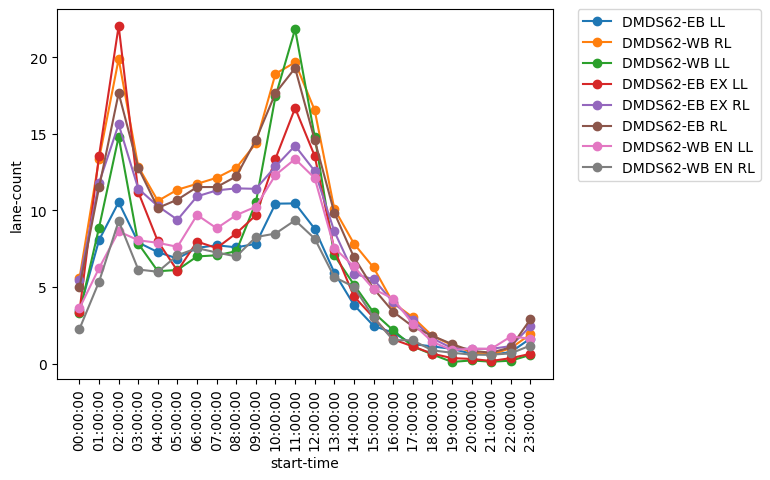

In [446]:
detector_id = df_11_14_DMDS62['detector-id'].unique()

for i in range(len(detector_id)):
    df_temp = df_11_14_DMDS62[df_11_14_DMDS62['detector-id']==detector_id[i]]
    df_temp = find_average(df_temp, 60, 'lane-count')
    plt.plot(df_temp['start-time'], df_temp['lane-count'], '-o', label=detector_id[i])



plt.xticks(rotation=90)
plt.xlabel('start-time')
plt.ylabel('lane-count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

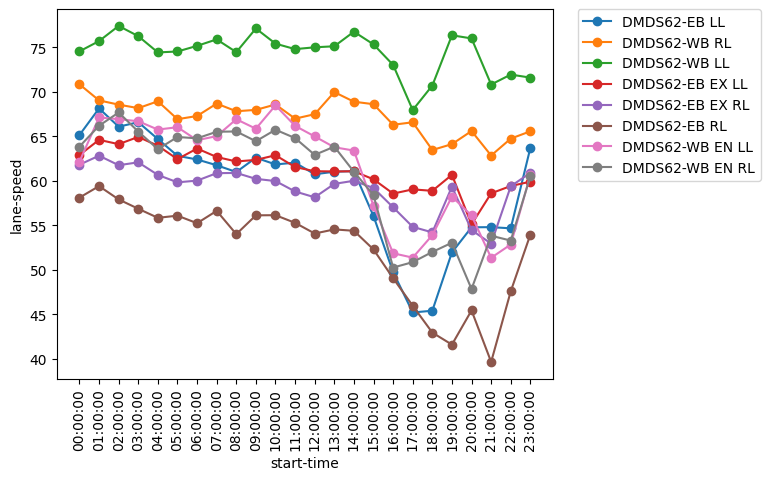

In [447]:
detector_id = df_11_14_DMDS62['detector-id'].unique()

for i in range(len(detector_id)):
    df_temp = df_11_14_DMDS62[df_11_14_DMDS62['detector-id']==detector_id[i]]
    df_temp = find_average(df_temp, 60, 'lane-speed')
    plt.plot(df_temp['start-time'], df_temp['lane-speed'], '-o', label=detector_id[i])



plt.xticks(rotation=90)
plt.xlabel('start-time')
plt.ylabel('lane-speed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

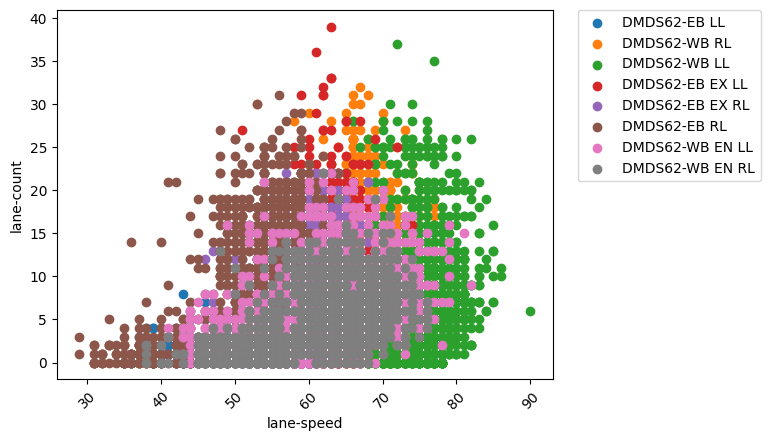

In [448]:
for i in range(len(detector_id)):
    df_temp = df_11_14_DMDS62[df_11_14_DMDS62['detector-id']==detector_id[i]]
    plt.scatter(df_temp['lane-speed'], df_temp['lane-count'], label=detector_id[i])



plt.xticks(rotation=45)
plt.ylabel('lane-count')
plt.xlabel('lane-speed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

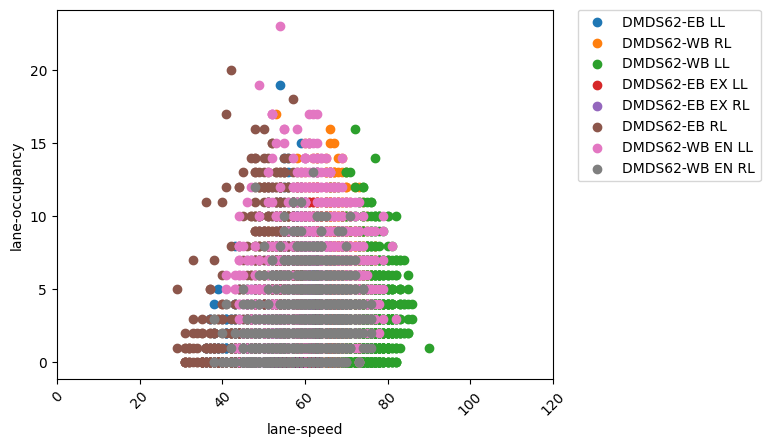

In [449]:
#plot "lane-occupancy" vs "lane-speed"
for i in range(len(detector_id)):
    df_temp = df_11_14_DMDS62[df_11_14_DMDS62['detector-id']==detector_id[i]]
    plt.scatter(df_temp['lane-speed'], df_temp['lane-occupancy'], label=detector_id[i])

plt.xticks(rotation=45)
plt.xlim(0, 120)
plt.ylabel('lane-occupancy')
plt.xlabel('lane-speed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


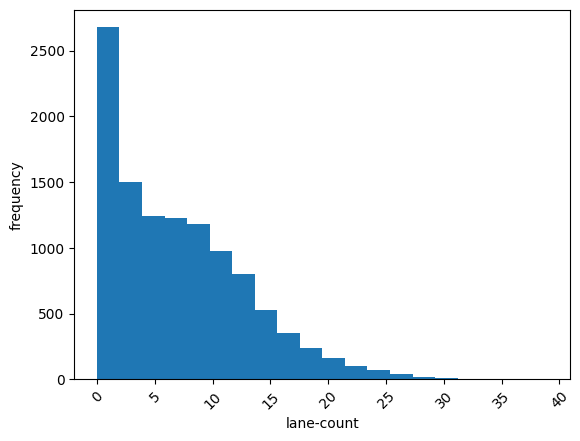

In [450]:
plt.hist(df_11_14_DMDS62['lane-count'], bins=20, label='lane-count')

plt.xticks(rotation=45)
plt.xlabel('lane-count')
plt.ylabel('frequency')
plt.show()

In [451]:
# fit the data with poisson distribution
import scipy
from scipy.stats import poisson
from scipy.optimize import fmin
data = df_11_14_DMDS62['lane-count']


In [452]:
def negative_log_likelihood(mu, all_k):
    log_pmf = poisson.logpmf(all_k, mu)
    log_likelihood = np.sum(log_pmf)
    negative_log_likelihood = -log_likelihood
    loss = negative_log_likelihood
    return loss


In [453]:
initial_mu = 1
result = fmin(negative_log_likelihood, initial_mu, args=(data,))

Optimization terminated successfully.
         Current function value: 48323.027615
         Iterations: 22
         Function evaluations: 44


Estimated lambda: 6.83


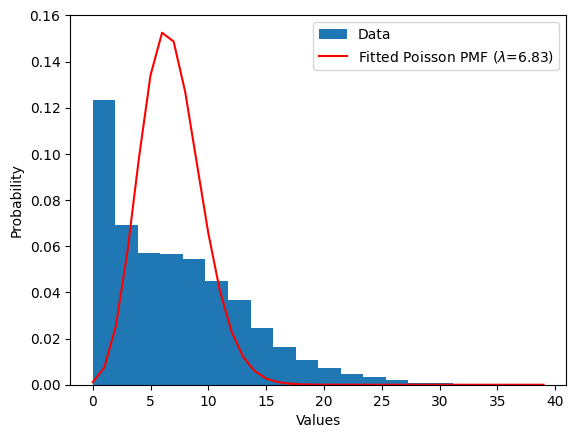

In [454]:
estimated_lambda = result[0]
print(f"Estimated lambda: {estimated_lambda:.2f}")
x = np.arange(min(data), max(data) + 1)
poisson_pmf = poisson.pmf(x, estimated_lambda)
np.unique(data)


plt.hist(df_11_14_DMDS62['lane-count'], bins=20, label='Data', density=True)
plt.plot(x, poisson_pmf, 'r', label=f"Fitted Poisson PMF ($\lambda$={estimated_lambda:.2f})") 

plt.xlabel("Values")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [455]:
## for specific lane/detector-id
data = df_11_14_DMDS62[df_11_14_DMDS62['lane-id']==5]['lane-count']

In [456]:
initial_mu = 1
result = fmin(negative_log_likelihood, initial_mu, args=(data,))

Optimization terminated successfully.
         Current function value: 6796.292601
         Iterations: 21
         Function evaluations: 42


Estimated lambda: 6.42


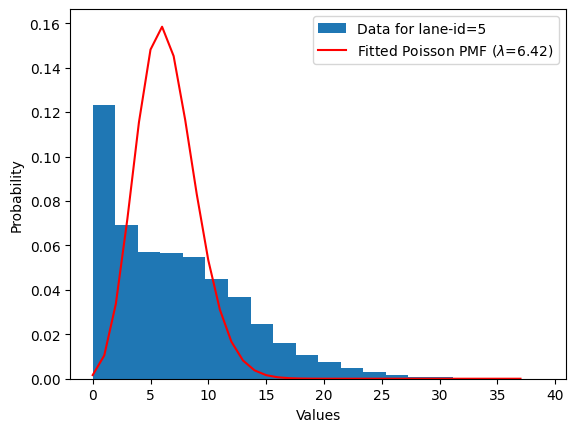

In [457]:
estimated_lambda = result[0]
print(f"Estimated lambda: {estimated_lambda:.2f}")
x = np.arange(min(data), max(data) + 1)
poisson_pmf = poisson.pmf(x, estimated_lambda)
np.unique(data)


plt.hist(df_11_14_DMDS62['lane-count'], bins=20, label='Data for lane-id=5', density=True)
plt.plot(x, poisson_pmf, 'r', label=f"Fitted Poisson PMF ($\lambda$={estimated_lambda:.2f})")
plt.xlabel("Values")
plt.ylabel("Probability")
plt.legend()
plt.show()

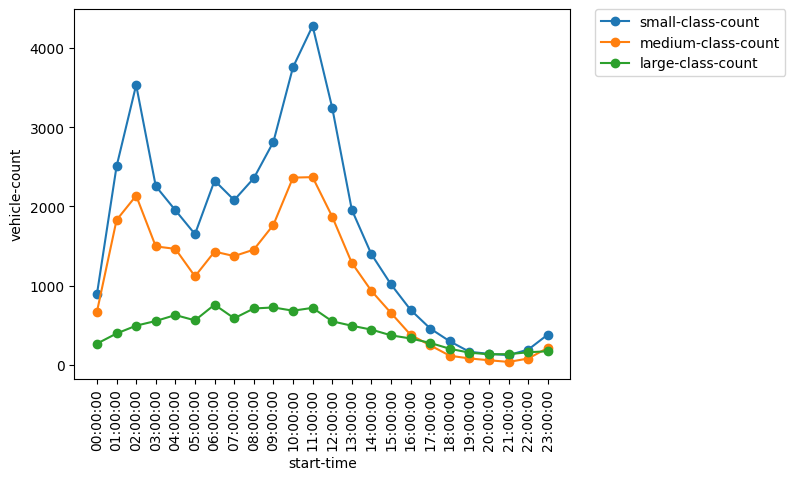

In [458]:
vehicle_class = ['small-class-count', 'medium-class-count', 'large-class-count']

for vc in vehicle_class:
    df_temp = find_sum(df_11_14_DMDS62, 60, vc)
    plt.plot(df_temp['start-time'], df_temp[vc], '-o', label=vc)

plt.xticks(rotation=90)
plt.xlabel('start-time')
plt.ylabel('vehicle-count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [459]:
# correlation between "lane-speed" and ['small-class-count', 'medium-class-count', 'large-class-count']
correlations = df_11_14_DMDS62[['lane-speed', 'small-class-count', 'medium-class-count', 'large-class-count']].corr()
correlations

,lane-speed,small-class-count,medium-class-count,large-class-count
lane-speed,1.000000,0.061125,0.458269,-0.102285
small-class-count,0.061125,1.000000,0.281096,0.143985
medium-class-count,0.458269,0.281096,1.000000,0.128114
large-class-count,-0.102285,0.143985,0.128114,1.000000


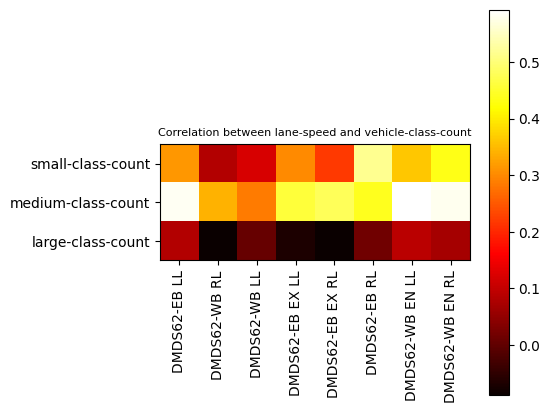

,0,1,2,3,4,5,6,7
0,0.313401,0.083494,0.120912,0.300100,0.219474,0.517775,0.363036,0.434370
1,0.582456,0.341351,0.286348,0.457148,0.479044,0.439487,0.592148,0.580763
2,0.082435,-0.087395,0.005667,-0.067765,-0.087677,0.016383,0.092154,0.069348


In [460]:
# do this for all the detectors
corrs = np.zeros((3, len(detector_id)))
for i in range(len(detector_id)):
    df_temp = df_11_14_DMDS62[df_11_14_DMDS62['detector-id']==detector_id[i]]
    correlations = df_temp[['lane-speed', 'small-class-count', 'medium-class-count', 'large-class-count']].corr()
    corrs[:, i] = correlations['lane-speed'].values[1:]

plt.figure(figsize=(5, 5))
plt.imshow(corrs, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(detector_id)), detector_id, rotation=90)
plt.yticks(np.arange(3), ['small-class-count', 'medium-class-count', 'large-class-count'])
plt.title('Correlation between lane-speed and vehicle-class-count', fontsize=8)
plt.show()
display(pd.DataFrame(corrs))

In [461]:
correlations = df_11_14_DMDS62[['lane-occupancy', 'small-class-count', 'medium-class-count', 'large-class-count']].corr()
correlations

,lane-occupancy,small-class-count,medium-class-count,large-class-count
lane-occupancy,1.000000,0.671460,0.600671,0.699560
small-class-count,0.671460,1.000000,0.281096,0.143985
medium-class-count,0.600671,0.281096,1.000000,0.128114
large-class-count,0.699560,0.143985,0.128114,1.000000


# Gaussian Mixture Model for Anomaly Detection

In [462]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


In [463]:
# extract lane-occupancy lane-speed	small-class-count	medium-class-count	large-class-count from the data
features = df_11_14_DMDS62[['lane-occupancy', 'lane-speed', 'small-class-count', 'medium-class-count', 'large-class-count']]
features = features.astype(float)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [464]:
data_scaled

array([[-1.07976657, -0.10416747, -0.890475  , -0.77628487, -0.74501252],
       [-0.76773126,  1.17683825, -0.890475  ,  0.24788877, -0.74501252],
       [-1.07976657,  0.94392812, -0.890475  , -0.77628487, -0.74501252],
       ...,
       [-1.07976657, -0.3370776 , -0.64415552, -0.77628487, -0.74501252],
       [-1.07976657,  0.94392812, -0.890475  , -0.77628487, -0.74501252],
       [-0.76773126, -0.10416747, -0.890475  , -0.77628487,  0.05065828]])

In [465]:
n_components = 2

gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data_scaled)


GaussianMixture(n_components=2, random_state=0)

In [466]:
threshold = np.quantile(gmm.score_samples(data_scaled), 0.005)
log_likelihood = gmm.score_samples(data_scaled)
anomalies = features[log_likelihood < threshold]

In [467]:
anomalies.head()

,lane-occupancy,lane-speed,small-class-count,medium-class-count,large-class-count
81824,9.0,72.0,2.0,20.0,0.0
116249,10.0,65.0,26.0,2.0,0.0
182807,12.0,66.0,6.0,17.0,3.0
187799,15.0,61.0,32.0,2.0,2.0
113640,11.0,62.0,27.0,4.0,0.0


In [468]:
anomalies

,lane-occupancy,lane-speed,small-class-count,medium-class-count,large-class-count
81824,9.0,72.0,2.0,20.0,0.0
116249,10.0,65.0,26.0,2.0,0.0
182807,12.0,66.0,6.0,17.0,3.0
187799,15.0,61.0,32.0,2.0,2.0
113640,11.0,62.0,27.0,4.0,0.0
277694,14.0,63.0,32.0,7.0,0.0
317382,14.0,56.0,28.0,2.0,1.0
317385,12.0,62.0,28.0,4.0,0.0
317387,15.0,67.0,11.0,20.0,1.0
79214,15.0,66.0,10.0,17.0,3.0


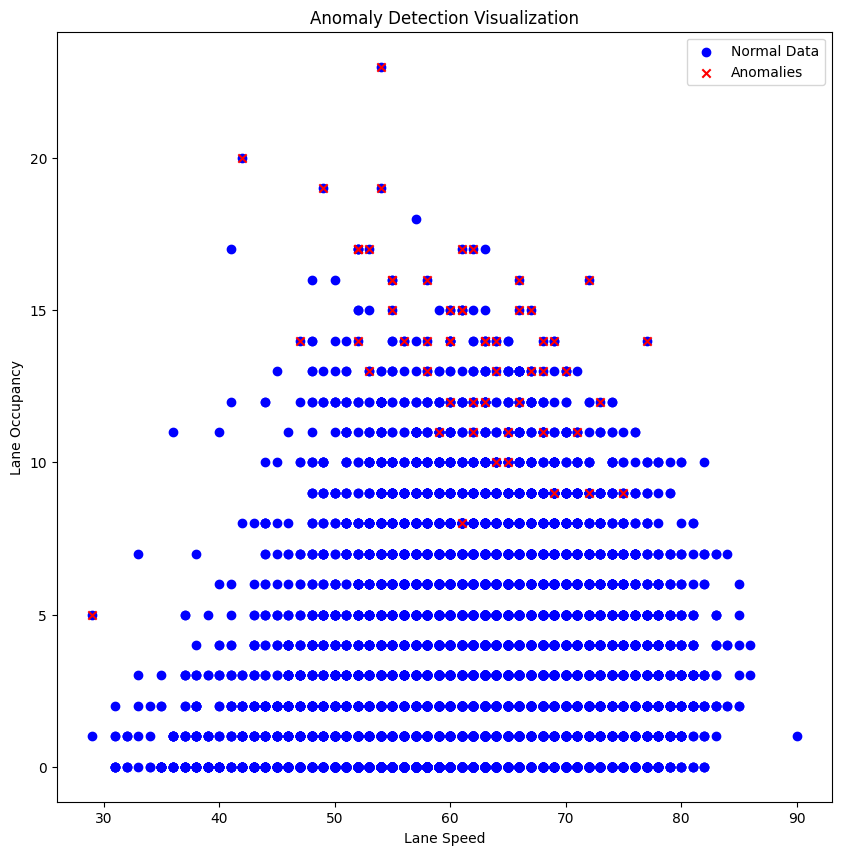

In [469]:
# visualize the anomalies
plt.figure(figsize=(10, 10))
plt.scatter(features['lane-speed'], features['lane-occupancy'], label='Normal Data', color='blue')
plt.scatter(anomalies['lane-speed'], anomalies['lane-occupancy'], label='Anomalies', color='red', marker='x')

# Set labels and title
plt.xlabel('Lane Speed')
plt.ylabel('Lane Occupancy')
plt.title('Anomaly Detection Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [470]:
import seaborn as sns

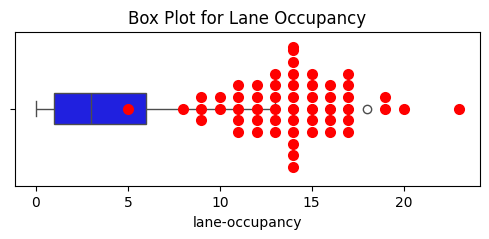

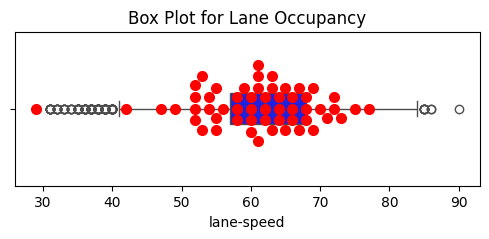

In [471]:
plt.figure(figsize=(6, 2))
sns.boxplot(x='lane-occupancy', data=features, color='blue', width=0.2)
sns.swarmplot(x='lane-occupancy', data=anomalies, color='red', size=8)
plt.title('Box Plot for Lane Occupancy')
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x='lane-speed', data=features, color='blue', width=0.2)
sns.swarmplot(x='lane-speed', data=anomalies, color='red', size=8)
plt.title('Box Plot for Lane Occupancy')
plt.show()


In [472]:

print('gmm weights: ', gmm.weights_)
print('gmm means: ', gmm.means_)
print('gmm covariances: ', gmm.covariances_)
print('gmm precisions: ', gmm.precisions_)
print('gmm lower bound: ', gmm.lower_bound_)

gmm weights:  [0.67235637 0.32764363]
gmm means:  [[ 0.46552349  0.22610619  0.35843943  0.34953752  0.27547757]
 [-0.95529915 -0.46399173 -0.73555231 -0.71728474 -0.56530657]]
gmm covariances:  [[[ 8.02997090e-01 -1.45752707e-01  4.81233653e-01  3.94723634e-01
    6.16899754e-01]
  [-1.45752707e-01  7.47299873e-01 -1.54197770e-01  4.24909540e-01
   -2.96654459e-01]
  [ 4.81233653e-01 -1.54197770e-01  1.07299847e+00  3.39289202e-02
   -8.99622872e-02]
  [ 3.94723634e-01  4.24909540e-01  3.39289202e-02  1.10627516e+00
   -1.02859447e-01]
  [ 6.16899754e-01 -2.96654459e-01 -8.99622872e-02 -1.02859447e-01
    1.19614259e+00]]

 [[ 4.69613815e-02 -5.08240697e-02  1.67344406e-02  4.16018389e-03
    6.59875869e-02]
  [-5.08240697e-02  1.19836839e+00 -4.61391013e-03  3.17299626e-02
   -9.35382618e-02]
  [ 1.67344406e-02 -4.61391013e-03  4.55149793e-02  3.60410343e-03
    5.62524520e-03]
  [ 4.16018389e-03  3.17299626e-02  3.60410343e-03  1.67008309e-02
   -9.87803906e-04]
  [ 6.59875869e-02 -